# Porcentaje de partidas finalizadas segun dificultad

In [597]:
from matplotlib import pyplot as plt
import pandas as pd
import os

#Abro el archivo de eventos
ruta = os.path.join(os.getcwd(), '..', 'datos', 'eventos_partidas.csv')
data_set = pd.read_csv(ruta, encoding='utf-8')

dataset_fin = data_set[["evento","estado","nivel"]]
dataset_fin = dataset_fin[dataset_fin["evento"] == "fin"]

print(dataset_fin)
print("*"*40)

dataset_por_nivel_canceladas = dataset_fin[dataset_fin["estado"] != "finalizado"]
dataset_por_nivel_canceladas = dataset_por_nivel_canceladas.groupby(["nivel"])["nivel"].count()

dataset_por_nivel_finalizadas = dataset_fin[dataset_fin["estado"] == "finalizado"]
dataset_por_nivel_finalizadas = dataset_por_nivel_finalizadas.groupby(["nivel"])["nivel"].count()

print(dataset_por_nivel_canceladas)
print("*"*40)
print(dataset_por_nivel_finalizadas)

   evento      estado     nivel
4     fin   cancelada    Normal
8     fin   cancelada  Einstein
20    fin  finalizado    Normal
27    fin  finalizado     Facil
34    fin  finalizado     Facil
41    fin  finalizado     Facil
48    fin  finalizado     Facil
53    fin   cancelada     Facil
58    fin   cancelada     Facil
64    fin   cancelada     Facil
71    fin  finalizado     Facil
****************************************
nivel
Einstein    1
Facil       3
Normal      1
Name: nivel, dtype: int64
****************************************
nivel
Facil     5
Normal    1
Name: nivel, dtype: int64


In [598]:
nuevo_df = pd.concat([dataset_por_nivel_canceladas,dataset_por_nivel_finalizadas], axis="columns",keys=None)
nuevo_df.index.name = ""
nuevo_df.columns = ["canceladas","finalizadas"]

nuevo_df = nuevo_df.fillna(0)
print(nuevo_df)


          canceladas  finalizadas
                                 
Einstein           1          0.0
Facil              3          5.0
Normal             1          1.0


C:\Users\Aaber\AppData\Local\Temp/ipykernel_15500/480479756.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  figure.tight_layout()


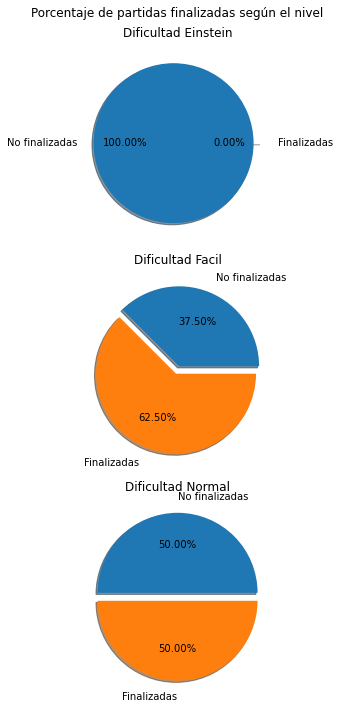

In [599]:
etiquetas = ["No finalizadas","Finalizadas"]

cant_graficos = len(nuevo_df.index)

figure, axis = plt.subplots(nrows=cant_graficos, ncols=1,constrained_layout = True, figsize=(10, 10))

grafico = 0
for dif in nuevo_df.index:
    axis[grafico].pie(nuevo_df.loc[dif],explode = (0.05, 0.05), labeldistance=1.2, labels=etiquetas, autopct='%1.2f%%', shadow=True)
    axis[grafico].set_title('Dificultad '+dif)
    grafico += 1

figure.suptitle('Porcentaje de partidas finalizadas según el nivel')
figure.tight_layout()